##### Node2Vec

In [1]:
# 使用Node2Vec对space_data进行压缩
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
print(type(G))
#G = nx.read_gml('football.gml', relabel=True)
print(len(G))


D:\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


<class 'networkx.classes.graph.Graph'>
62


In [2]:
# 初始化Node2Vec模型
#model = DeepWalk(G, walk_length=10, num_walks=5, workers=1)
model = Node2Vec(G, walk_length = 10, num_walks = 5, p = 0.25, q = 4, workers = 1)

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.84it/s]


In [3]:
# 模型训练
result = model.fit(window=4, iter=20)

In [4]:
# 得到节点的embedding
embeddings = result.wv
print(embeddings)

In [5]:
print(result.wv.most_similar('Haecksel'))

[('Vau', 0.9994208812713623), ('Zap', 0.999305009841919), ('Jonah', 0.9992603063583374), ('MN105', 0.999190092086792), ('MN83', 0.9991085529327393), ('Cross', 0.998870849609375), ('Topless', 0.9988443851470947), ('MN60', 0.9988375306129456), ('Trigger', 0.9988370537757874), ('Double', 0.9987376928329468)]


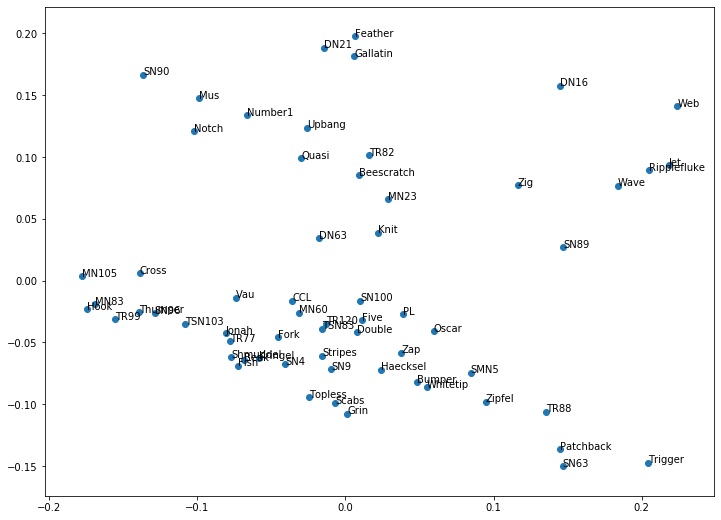

In [6]:
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    
plot_nodes(result.wv.vocab)


##### GCN

In [24]:
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

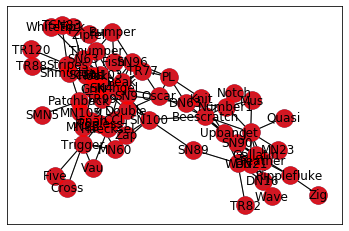

In [25]:
plot_graph(G)

In [26]:
# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
#print(G)
#print(type(G))

In [27]:
# 加value
for i,n in enumerate(list(G.nodes)):
    G.nodes[n].update({'value': i+1})

In [28]:
print(list(G.nodes()))

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [29]:

print(G.nodes['Beescratch']['value'])
#print(G.nodes)
#print(G.nodes[:,'value'])

2


In [30]:
# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A) 

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [31]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [32]:
# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]


In [33]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [34]:
# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

W_1=
 [[-0.49933471  1.32942057  0.30589865 -0.35218489]
 [-0.34235609  0.1667175  -0.04478641 -1.0033258 ]
 [ 0.47898108 -0.82571512  1.46594485  2.18407105]
 [-0.96080745 -0.31020879  1.45460998  0.03922026]
 [-2.39455309  1.93957161 -0.519832   -0.4907424 ]
 [ 0.47099329  0.76858239 -1.01261207 -0.48917592]
 [-0.82356133 -0.01497661 -0.58076562  0.07866539]
 [ 1.33790919  1.88505819 -0.76241312 -0.71199739]
 [-0.17129607  1.12612582 -1.15642153  0.21032506]
 [-1.57859689  0.53622672  1.06691626 -0.29787134]
 [-0.5566243   0.45242289  0.90414117  0.27273722]
 [ 0.17030465  1.03266311 -0.84091855 -0.93618717]
 [-1.91535613 -0.58163654  0.91732044  1.23821004]
 [ 0.68617374 -0.46826812 -0.3949255  -0.26107214]
 [ 0.30720592 -0.13708061  0.81992714  1.12042116]
 [-0.33976129 -0.24109801  0.61930937 -0.41680185]
 [-0.43279262 -1.39201197  0.18559882 -0.30268872]
 [ 0.95485616  0.65092309  0.77994025 -1.00918713]
 [-0.19913016 -0.41563584 -0.54919919  0.0128572 ]
 [ 0.11917033  1.11884856

In [35]:
# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return(abs(x)+x)/2

In [36]:
# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

In [37]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.31991953, 1.02259391]), 'Beescratch': array([0.        , 1.46016752]), 'Bumper': array([0.4863288 , 0.83671106]), 'CCL': array([0.        , 0.78553563]), 'Cross': array([0.02441526, 0.28981563]), 'DN16': array([0.        , 0.66749088]), 'DN21': array([0.        , 0.73505353]), 'DN63': array([0.        , 2.14752915]), 'Double': array([0.17563401, 0.65898881]), 'Feather': array([0.        , 0.49448497]), 'Fish': array([0.62623293, 0.95213869]), 'Five': array([0.05530938, 0.02063683]), 'Fork': array([0.53650311, 0.90692481]), 'Gallatin': array([0.       , 0.5368053]), 'Grin': array([0.01763217, 0.76787871]), 'Haecksel': array([0.08898798, 0.57903116]), 'Hook': array([0.04192183, 0.43767562]), 'Jet': array([0.        , 1.47562135]), 'Jonah': array([0.28918048, 0.21153811]), 'Knit': array([0.        , 2.04221837]), 'Kringel': array([0.41773276, 0.79096017]), 'MN105': array([0.22936608, 0.18091898]), 'MN23': array([0.        , 1.09630118]), 'MN60':

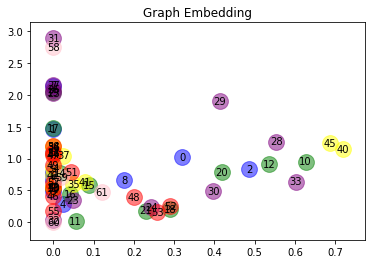

In [38]:
# 不同节点value，绘制不同的颜色
def getValue(value):
    t=(value+1)/12
    colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
    return colorList[int(t)]
# 绘制output，节点GCN embedding可视化

def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        value = G.nodes[node_name]['value']
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),color = getValue(value),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output, 'Graph Embedding')

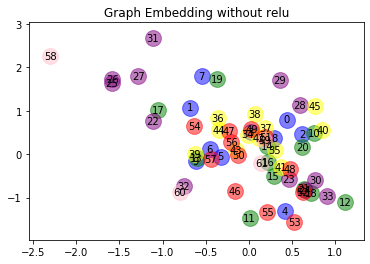

In [39]:
# 尝试去掉激活函数relu
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
plot_node(output, 'Graph Embedding without relu')